# LDA - Linear Discriminant Analysis
## Baza de date - IRIS 

In [40]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

In [53]:
# Importing the dataset

iris = datasets.load_iris()
X = iris.data
y = iris.target

print('\n Flori de iris, clasele: ', iris.target_names)
print('\n Trasaturile folosite pentru clasificarea florilor: \n',iris.feature_names,'\n')
print(X)
print(y)


 Flori de iris, clasele:  ['setosa' 'versicolor' 'virginica']

 Trasaturile folosite pentru clasificarea florilor: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]

In [43]:
# Setare numar de imagini care vor fi considerate la testare 
# (retul imaginilor vor fi utilizare la antrenare)
test_size = 0.7     # 0.3 / 0.5 / 0.7 

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 101)

print(' Setul de date vor fi impartite: ')
print('\t train:', X_train.shape[0],', test:',  X_test.shape[0])

 Setul de date vor fi impartite: 
	 train: 45 , test: 105


In [49]:
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

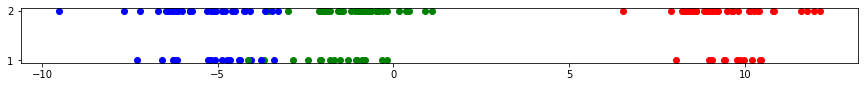

In [46]:
clabel = ['red', 'green', 'blue']
fig = plt.figure(figsize=(15,1))
for i in range(0,X_train_lda.shape[0]):
    plt.scatter(X_train_lda[i,0],1, c=clabel[y_train[i]], marker='o')
for i in range(0,X_test_lda.shape[0]):
    plt.scatter(X_test_lda[i,0],2, c=clabel[y_test[i]], marker='o')

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics


classifierOvO = OneVsOneClassifier(LDA(n_components = 1))
y_scoreOvO = classifierOvO.fit(X_train, y_train).decision_function(X_test)
y_predOvO = np.argmax(y_scoreOvO, axis=1)

print('\n Acuratete clasificator OneVsOne in setul de test: ', metrics.accuracy_score(y_test, y_predOvO)*100, '%')
print(' Matricea de confuzie in setul de test: \n', metrics.confusion_matrix(y_test,y_predOvO))


 Acuratete clasificator OneVsOne in setul de test:  100.0 %
 Matricea de confuzie in setul de test: 
 [[38  0  0]
 [ 0 34  0]
 [ 0  0 33]]


In [48]:
classifierOvR = OneVsRestClassifier(LDA(n_components = 1))
y_scoreOvR = classifierOvR.fit(X_train, y_train).decision_function(X_test)
y_predOvR = np.argmax(y_scoreOvR, axis=1)

print('\n Acuratete clasificator OneVsAll in setul de test: ', metrics.accuracy_score(y_test, y_predOvR)*100, '%')
print(' Matricea de confuzie in setul de test: \n', metrics.confusion_matrix(y_test,y_predOvR))


 Acuratete clasificator OneVsAll in setul de test:  87.61904761904762 %
 Matricea de confuzie in setul de test: 
 [[38  0  0]
 [ 0 27  7]
 [ 0  6 27]]
